## 성별에 따른 배달 소비 관계 분석

삼성카드가 추정한 배달음식 선호성향 따른 외식소비패턴 분석 데이터입니다. 카드사에서 제공한 샘플데이터이기 때문에 일반화 할 수 없음을 미리 밝힙니다. <br>
※ 배달식선호/건강관심 성향 : 당사가 회원의 소비데이터로 모델링하여 추정한 고객의 특성. 지수를 20 등급화(1등급이 제일 관심도가 높음/건강관심도 페르소나 등급(20등급)) 

### 패키지 가져오기

In [123]:
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from pandas import read_excel, DataFrame, melt, pivot_table
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sb
import numpy as np
import sys
import os

In [124]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 불러오기

In [125]:
df = read_excel("삼성카드_외식소비패턴.xlsx")
df

,소비년월,거주지_광역시도,거주지_시군구,배달식선호등급,건강관심도등급,연령대,성별,외식업종분류,평일휴일,소비건수합계
0,202009,경기,시흥시,1,17,20대,남성,간편음식,평일,83
1,202009,경기,부천시,1,15,20대,여성,한식,평일,101
2,202009,경기,이천시,4,19,30대,남성,피자/치킨,평일,12
3,202009,경기,오산시,2,16,30대,남성,디저트,평일,95
4,202009,경기,김포시,10,16,40대,남성,디저트,휴일,49
...,...,...,...,...,...,...,...,...,...,...
95,202009,인천,부평구,5,19,30대,남성,한식,평일,71
96,202009,인천,부평구,9,15,40대,여성,디저트,평일,36
97,202010,인천,서구,3,15,20대,여성,한식,평일,37
98,202010,인천,연수구,1,18,30대,남성,간편음식,평일,84


### 데이터 타입(종류) 확인

In [126]:
df.shape

(100, 10)

In [127]:
df.dtypes

소비년월         int64
거주지_광역시도    object
거주지_시군구     object
배달식선호등급      int64
건강관심도등급      int64
연령대         object
성별          object
외식업종분류      object
평일휴일        object
소비건수합계       int64
dtype: object

In [128]:
df = df.astype({'거주지_광역시도': 'category', '거주지_시군구': 'category', '연령대': 'category','성별': 'category', '외식업종분류': 'category', '평일휴일': 'category'})
df.dtypes

소비년월           int64
거주지_광역시도    category
거주지_시군구     category
배달식선호등급        int64
건강관심도등급        int64
연령대         category
성별          category
외식업종분류      category
평일휴일        category
소비건수합계         int64
dtype: object

### 데이터 전처리
1) 결측치 확인 → 결측치 없음
2) '소비건수합계' column의 이상치 확인

In [129]:
empty = df.isnull()
empty.sum()

소비년월        0
거주지_광역시도    0
거주지_시군구     0
배달식선호등급     0
건강관심도등급     0
연령대         0
성별          0
외식업종분류      0
평일휴일        0
소비건수합계      0
dtype: int64

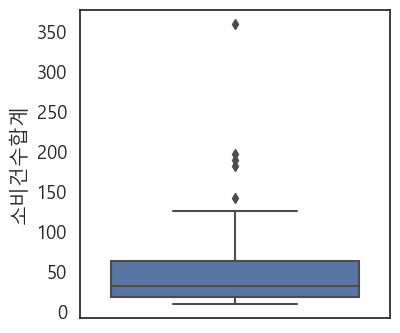

In [130]:
plt.figure(figsize=(4, 4))
sb.boxplot(data=df,y='소비건수합계')
plt.show()
plt.close()

In [131]:
empty = df.isnull()
empty.sum()

소비년월        0
거주지_광역시도    0
거주지_시군구     0
배달식선호등급     0
건강관심도등급     0
연령대         0
성별          0
외식업종분류      0
평일휴일        0
소비건수합계      0
dtype: int64

### 수치형 변수의 데이터 요약 통계 

In [132]:
df.describe()

,소비년월,배달식선호등급,건강관심도등급,소비건수합계
count,100.00000,100.000000,100.000000,100.000000
mean,202009.57000,7.430000,13.630000,49.010000
std,0.49757,6.039023,5.434003,50.061073
min,202009.00000,1.000000,1.000000,10.000000
25%,202009.00000,2.000000,10.750000,19.000000
50%,202010.00000,5.500000,15.500000,32.000000
75%,202010.00000,12.000000,18.000000,63.250000
max,202010.00000,20.000000,20.000000,360.000000


### 명목형 변수에 대한 기술 통계

In [133]:
df2 = df.drop(['소비년월', '배달식선호등급', '건강관심도등급', '소비건수합계'], axis=1)

for v in df2.columns:
    print(df2[v].value_counts())
    print("-" * 30)

거주지_광역시도
서울    51
경기    14
인천     8
대전     7
광주     6
부산     6
대구     5
울산     2
세종     1
Name: count, dtype: int64
------------------------------
거주지_시군구
서구     7
서초구    6
북구     6
송파구    6
강서구    5
동작구    4
노원구    4
마포구    3
강남구    3
부천시    3
동구     3
양천구    3
이천시    3
수성구    2
부평구    2
연수구    2
중구     2
성동구    2
중랑구    2
강동구    2
강북구    2
남구     2
관악구    2
광명시    2
도봉구    1
시흥시    1
종로구    1
은평구    1
유성구    1
울주군    1
용산구    1
오산시    1
양주시    1
수영구    1
동래구    1
광주시    1
광진구    1
성북구    1
구로구    1
군포시    1
금정구    1
김포시    1
남동구    1
달서구    1
대덕구    1
       1
Name: count, dtype: int64
------------------------------
연령대
30대      30
40대      26
50대      20
20대      18
60대이상     6
Name: count, dtype: int64
------------------------------
성별
남성    50
여성    50
Name: count, dtype: int64
------------------------------
외식업종분류
디저트       35
한식        29
간편음식      19
고기         5
주점         3
중식         3
피자/치킨      3
일식/회       2
양식/아시안     1
Name: count, dtype: int64
-------------------------

1. 지역별

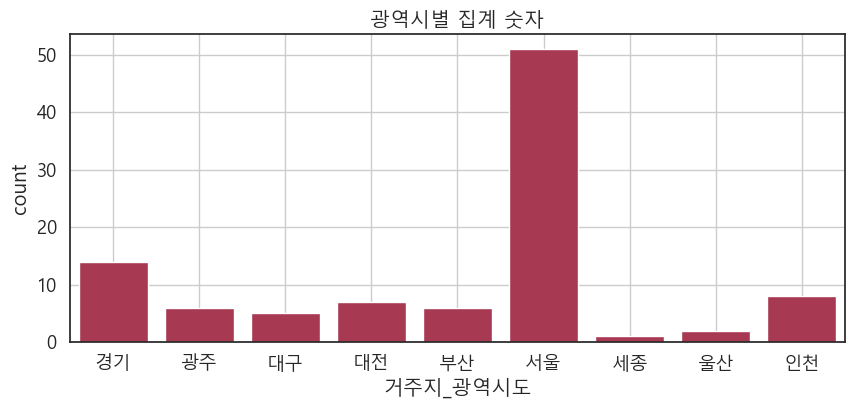

In [134]:
# x축에 설정된 집단별 빈도수 확인
sb.countplot(data=df,x="거주지_광역시도",color='#BB2649')
plt.title('광역시별 집계 숫자')
plt.grid()
plt.show()
plt.close()

In [135]:
지역별 = pivot_table(df,
            index='거주지_광역시도', 
            columns='성별', 
            values='소비건수합계',
            aggfunc='mean' 
)

지역별 = 지역별.fillna(value=0)
지역별

성별,남성,여성
거주지_광역시도,,
경기,41.125000,43.166667
광주,11.000000,21.800000
대구,44.666667,17.000000
대전,22.500000,29.000000
부산,18.000000,30.750000
서울,44.280000,76.538462
세종,24.000000,0.000000
울산,19.000000,0.000000
인천,55.750000,76.750000


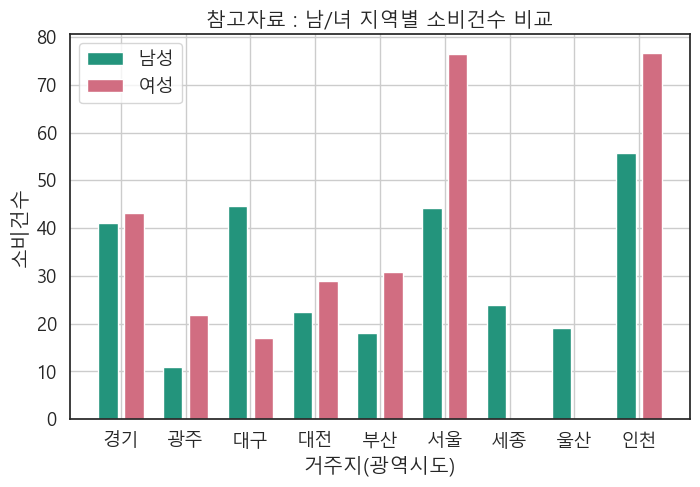

In [136]:
x_rables=list(지역별.index)
x = np.array(range(0,len(x_rables)))
y1 = list(지역별['남성'])
y2 = list(지역별['여성'])

plt.rcParams['figure.figsize'] = (8,5)
plt.figure()
plt.title('참고자료 : 남/녀 지역별 소비건수 비교')
plt.bar(x-0.2,지역별['남성'],color='#23947c',label='남성',width=0.3)
plt.bar(x+0.2,지역별['여성'],color='#d16d81',label='여성',width=0.3)
plt.xlabel('거주지(광역시도)')
plt.ylabel('소비건수')
plt.grid()
plt.legend()
plt.xticks(x,x_rables)
plt.show()
plt.close()

In [137]:
거주지별소비건수 = df.query('거주지_광역시도=="서울"')
거주지별소비건수 = 거주지별소비건수.sort_values('거주지_시군구')
거주지별소비건수.head()

,소비년월,거주지_광역시도,거주지_시군구,배달식선호등급,건강관심도등급,연령대,성별,외식업종분류,평일휴일,소비건수합계
43,202009,서울,강남구,2,19,30대,남성,한식,휴일,64
67,202010,서울,강남구,8,14,30대,여성,디저트,평일,110
66,202010,서울,강남구,2,18,30대,여성,한식,휴일,73
41,202009,서울,강동구,2,20,30대,여성,한식,휴일,40
77,202010,서울,강동구,12,11,40대,여성,한식,평일,35


In [138]:
구별 = pivot_table(거주지별소비건수,
            index='거주지_시군구', 
            columns='성별', 
            values='소비건수합계',
            aggfunc='mean' 
)

구별 = 구별.fillna(value=0)
구별

성별,남성,여성
거주지_시군구,,
강남구,64.0,91.50
강동구,0.0,37.50
강북구,29.5,0.00
강서구,82.5,69.00
관악구,81.0,198.00
광진구,16.0,0.00
구로구,0.0,17.00
노원구,33.0,36.50
도봉구,10.0,0.00


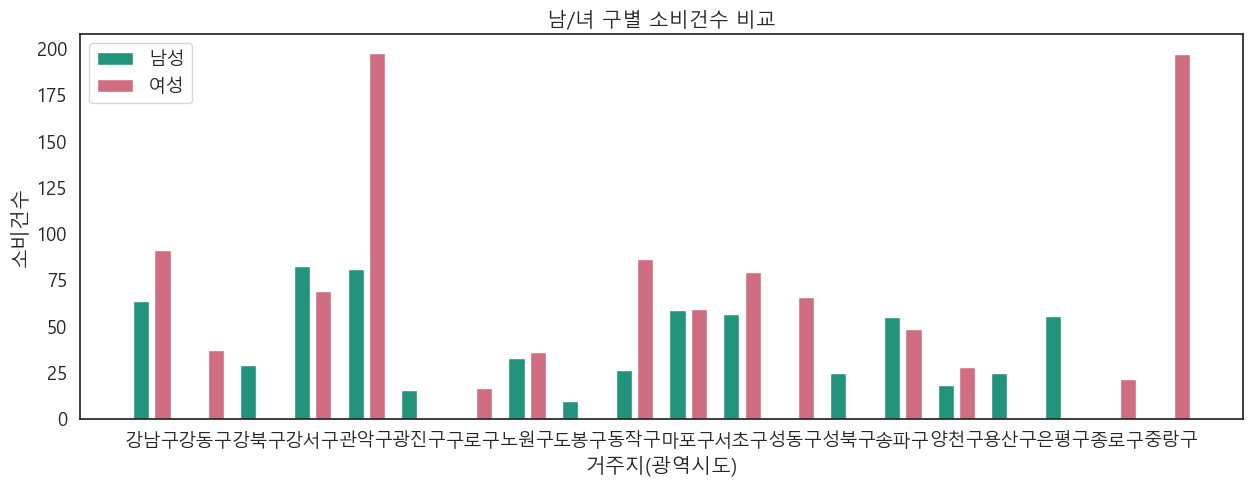

In [139]:
x_rables=list(구별.index)
x = np.array(range(0,len(x_rables)))
y1 = list(구별['남성'])
y2 = list(구별['여성'])

plt.rcParams['figure.figsize'] = (15,5)
plt.figure()
plt.title('남/녀 구별 소비건수 비교')
plt.bar(x-0.2,구별['남성'],color='#23947c',label='남성',width=0.3)
plt.bar(x+0.2,구별['여성'],color='#d16d81',label='여성',width=0.3)
plt.xlabel('거주지(광역시도)')
plt.ylabel('소비건수')
plt.legend()
plt.xticks(x,x_rables)
plt.show()
plt.close()

In [140]:
성별_소비 = pivot_table(df,
            index='소비년월', 
            columns='성별', 
            values='소비건수합계',
            aggfunc='mean' 
)
성별_소비

성별,남성,여성
소비년월,,
202009,47.052632,50.583333
202010,35.419355,65.192308


In [141]:
x_rables=list(성별_소비.index)
x = np.array(range(0,len(x_rables)))
y1 = list(성별_소비['남성'])
y2 = list(성별_소비['여성'])

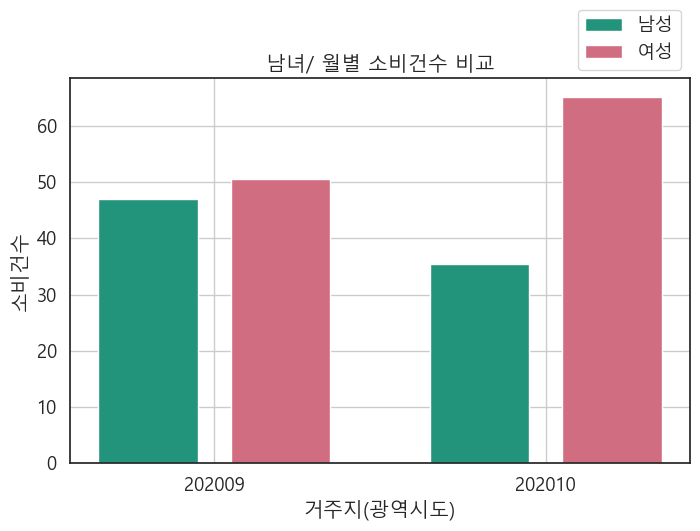

In [142]:
plt.rcParams['figure.figsize'] = (8,5)
plt.figure()
plt.title('남녀/ 월별 소비건수 비교')
plt.bar(x-0.2,성별_소비['남성'],color='#23947c',label='남성',width=0.3)
plt.bar(x+0.2,성별_소비['여성'],color='#d16d81',label='여성',width=0.3)
plt.xlabel('거주지(광역시도)')
plt.ylabel('소비건수')
plt.grid()
plt.legend(loc="center right",bbox_to_anchor=(1,1.1))
plt.xticks(x,x_rables)
plt.show()
plt.close()

3. 업종별 

In [143]:
성별_업종 = pivot_table(df,
            index='외식업종분류', 
            columns='성별',
            values='소비건수합계',
            aggfunc='mean' 
)
성별_업종 = 성별_업종.fillna(value=0)
성별_업종

성별,남성,여성
외식업종분류,,
간편음식,46.142857,50.750000
고기,48.500000,23.666667
디저트,38.571429,74.142857
양식/아시안,0.000000,49.000000
일식/회,18.000000,0.000000
주점,22.333333,0.000000
중식,20.666667,0.000000
피자/치킨,12.333333,0.000000
한식,51.875000,47.923077


In [144]:
성별_업종['합계'] = 성별_업종[성별_업종.columns[:]].sum(axis=1)
성별_업종

성별,남성,여성,합계
외식업종분류,,,
간편음식,46.142857,50.750000,96.892857
고기,48.500000,23.666667,72.166667
디저트,38.571429,74.142857,112.714286
양식/아시안,0.000000,49.000000,49.000000
일식/회,18.000000,0.000000,18.000000
주점,22.333333,0.000000,22.333333
중식,20.666667,0.000000,20.666667
피자/치킨,12.333333,0.000000,12.333333
한식,51.875000,47.923077,99.798077


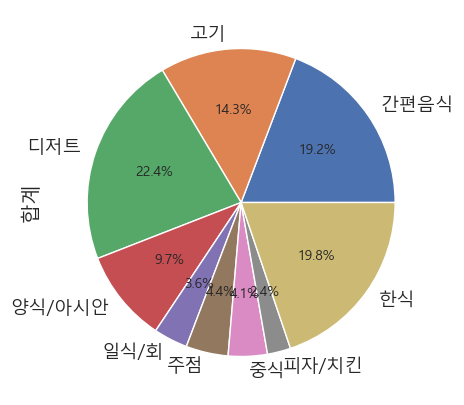

In [145]:
성별_업종['합계'].plot.pie(autopct='%0.1f%%')
plt.show()
plt.close()

4. 성별

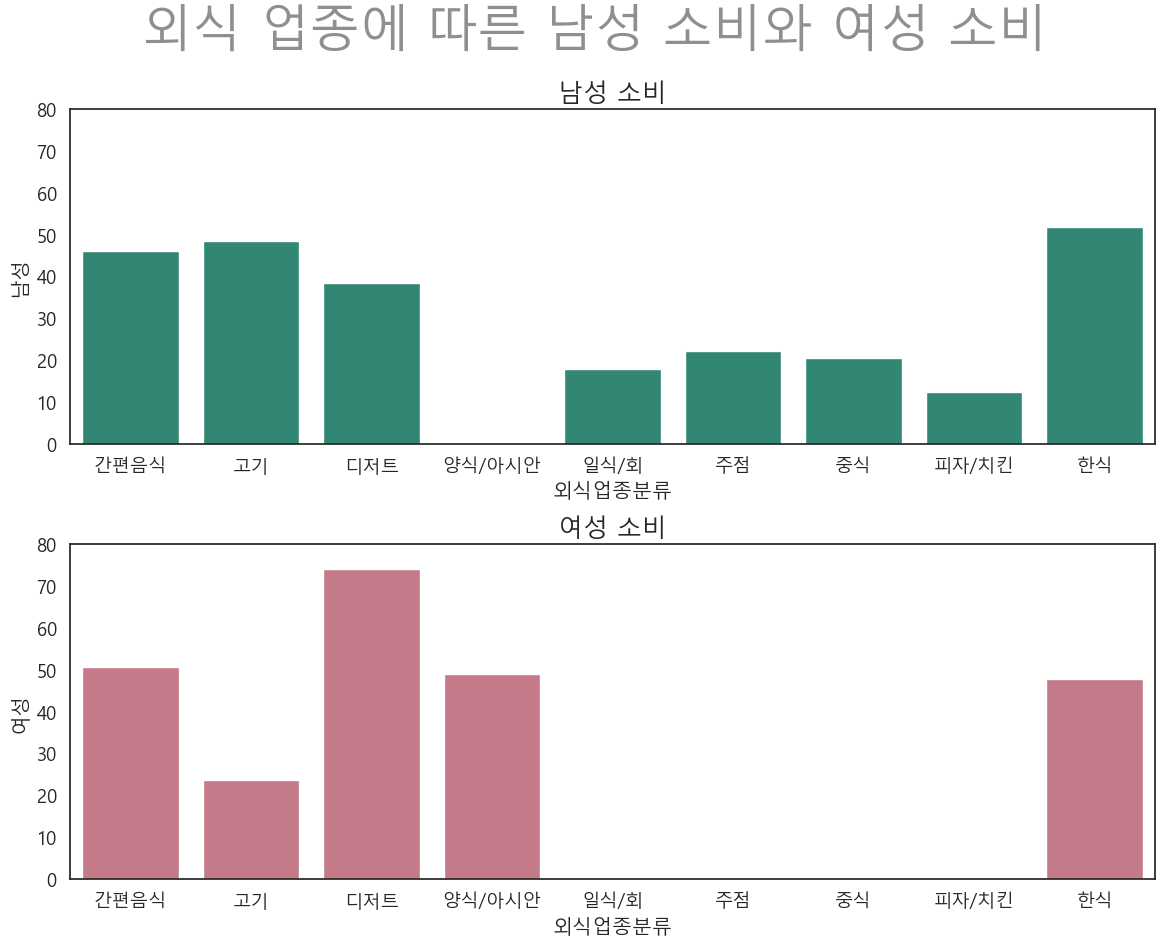

In [146]:
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('외식 업종에 따른 남성 소비와 여성 소비', fontsize=36, color='#8f8f8f')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

sb.barplot(data=성별_업종, x=성별_업종.index, y='남성', color="#23947c", ax=ax1_left)
ax1_left.set_title('남성 소비', fontsize=18)
ax1_left.set_ylim(0, 80) 

sb.barplot(data=성별_업종, x=성별_업종.index, y='여성', color="#d16d81", ax=ax2_left)
ax2_left.set_title('여성 소비', fontsize=18)
ax2_left.set_ylim(0, 80) 

plt.show()
plt.close()

5. 연령별

In [147]:
성별_연령 = pivot_table(df,
            index='연령대', 
            columns='성별',
            values='소비건수합계',
            aggfunc='mean' 
)
성별_연령 = 성별_연령.fillna(value=0)
성별_연령

성별,남성,여성
연령대,,
20대,49.125000,84.300000
30대,54.529412,85.615385
40대,31.818182,34.466667
50대,25.000000,30.666667
60대이상,15.666667,53.333333


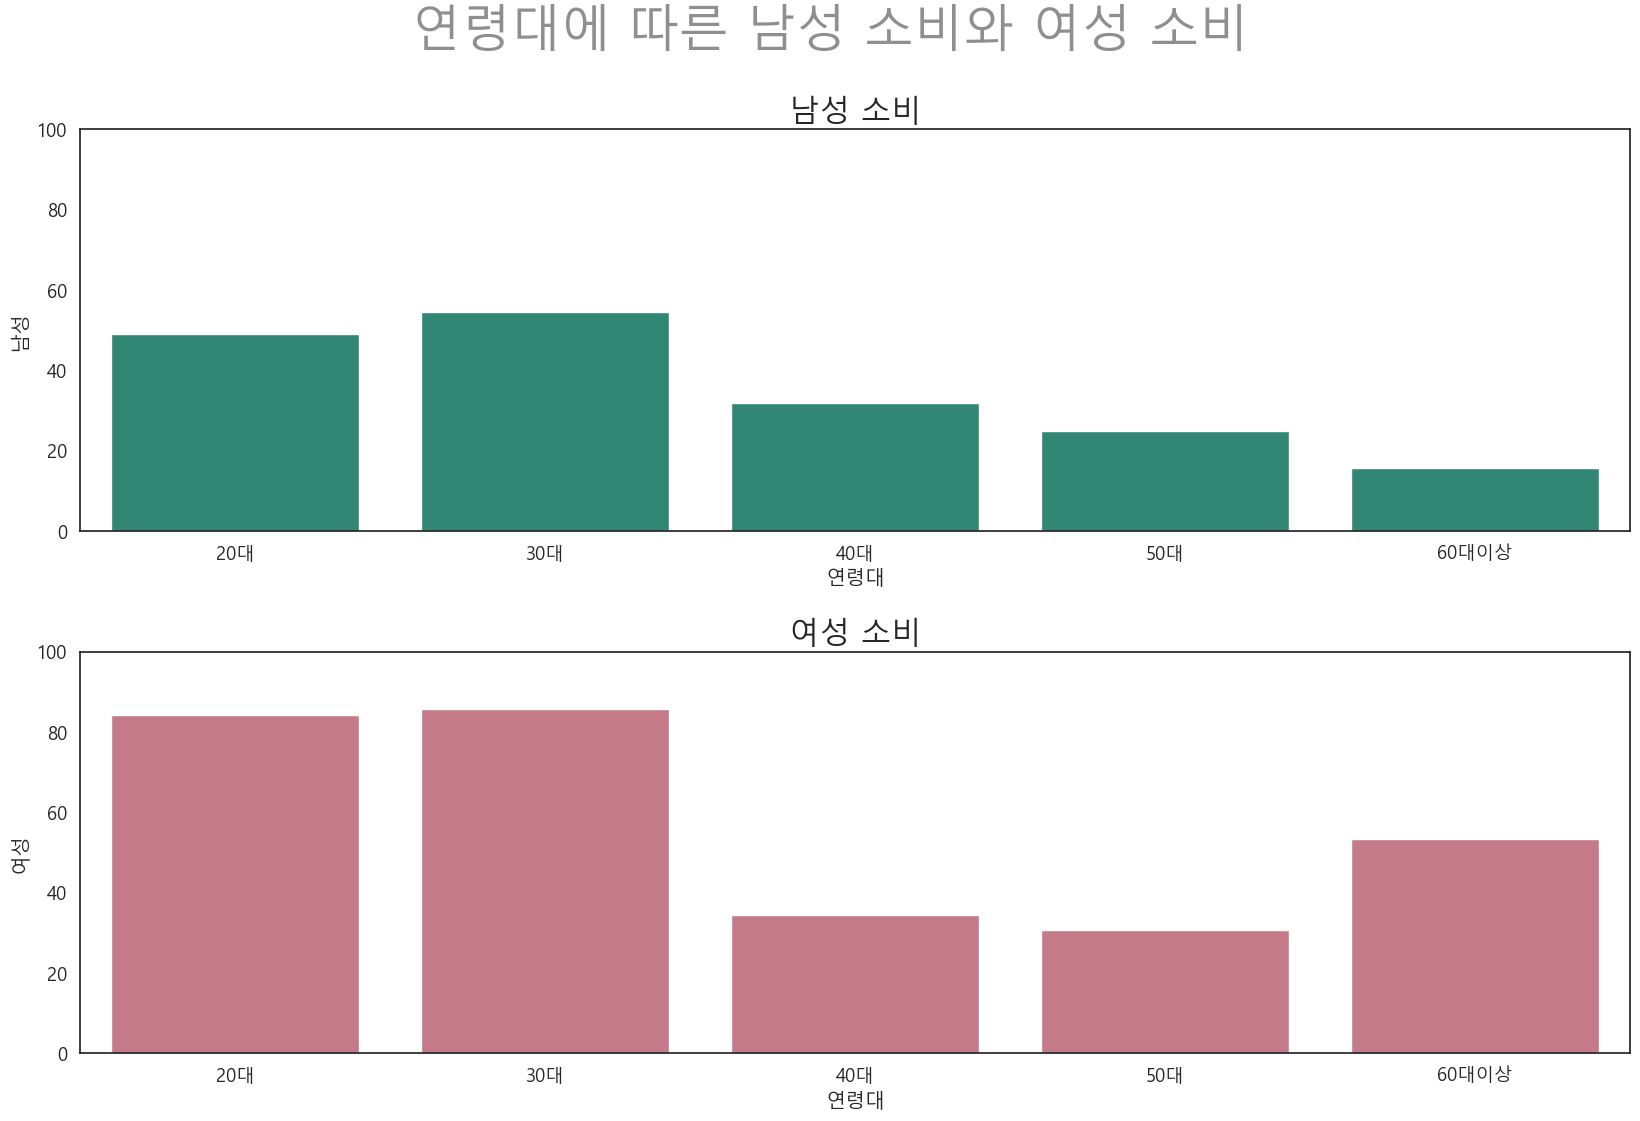

In [148]:
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 12))
fig.suptitle('연령대에 따른 남성 소비와 여성 소비', fontsize=36, color='#8f8f8f')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

sb.barplot(data=성별_연령, x=성별_연령.index, y='남성', color="#23947c", ax=ax1_left)
ax1_left.set_title('남성 소비', fontsize=22)
ax1_left.set_ylim(0, 100) 

sb.barplot(data=성별_연령, x=성별_연령.index, y='여성', color="#d16d81", ax=ax2_left)
ax2_left.set_title('여성 소비', fontsize=22)
ax2_left.set_ylim(0, 100) 

plt.show()
plt.close()

### 배달식 선호등급

In [149]:
성별_배달식선호등급 = pivot_table(df,
            index='배달식선호등급', 
            columns='성별',
            values='소비건수합계',
            aggfunc='mean' 
)
성별_배달식선호등급 = 성별_배달식선호등급.fillna(value=0)
성별_배달식선호등급

성별,남성,여성
배달식선호등급,,
1,56.090909,113.857143
2,54.666667,89.333333
3,24.500000,35.285714
4,12.500000,82.000000
5,69.000000,61.250000
6,50.333333,25.000000
7,33.750000,0.000000
8,0.000000,110.000000
9,13.500000,42.500000


In [150]:
desc_배달식 = 성별_배달식선호등급.describe()
desc_배달식

성별,남성,여성
count,19.000000,19.000000
mean,30.860048,50.568922
std,19.301530,35.203726
min,0.000000,0.000000
25%,15.000000,26.750000
50%,27.000000,35.333333
75%,45.166667,72.500000
max,69.000000,113.857143


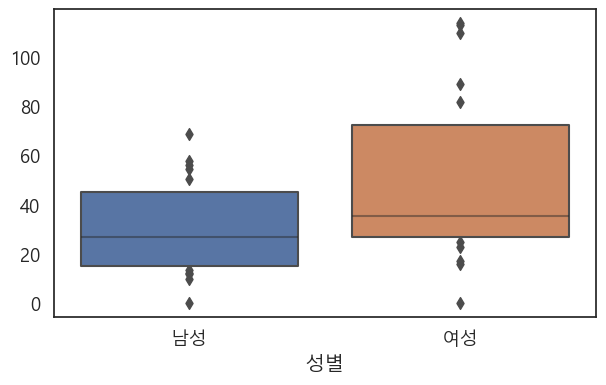

In [201]:
plt.rcParams['figure.figsize'] = (7,4)
plt.figure()
sb.boxenplot(data=성별_배달식선호등급)
plt.show()
plt.close()

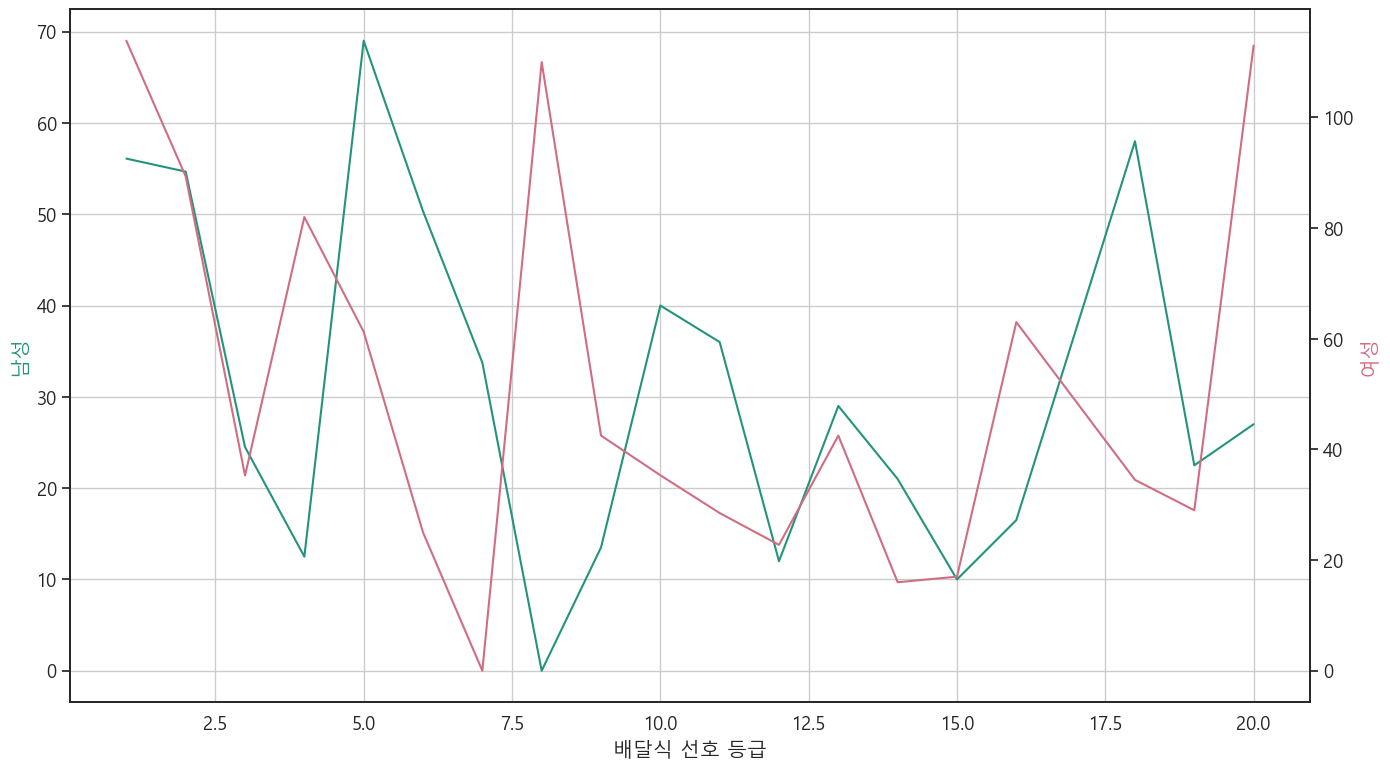

In [203]:
fig, ax1 = plt.subplots(1,1,figsize=(16,9)) # 그래프 시작
ax2 = ax1.twinx() # ax1에 겹쳐지는 서브플롯 생성

# ax1에 그래프 그리기
성별_배달식선호등급['남성'].plot(ax=ax1,color='#23947c')
ax1.set_xlabel('배달식 선호 등급')
ax1.set_ylabel('남성',color='#23947c')
ax1.grid()

# x축 좌표위의 텍스트 처리
start = min(성별_배달식선호등급.index)
end =  max(성별_배달식선호등급.index)

# ax2에 그래프 그리기
성별_배달식선호등급['여성'].plot(ax=ax2, color='#d16d81')
ax2.set_ylabel('여성',color='#d16d81')

plt.show()
plt.close()

### 건강관심도 등급

In [153]:
성별_건강관심도등급 = pivot_table(df,
            index='건강관심도등급', 
            columns='성별',
            values='소비건수합계',
            aggfunc='mean' 
)
성별_건강관심도등급 = 성별_건강관심도등급.fillna(value=0)
성별_건강관심도등급

성별,남성,여성
건강관심도등급,,
1,17.000000,65.000000
2,20.000000,42.500000
4,17.000000,0.000000
5,28.500000,0.000000
6,18.500000,12.000000
7,10.000000,63.000000
8,31.000000,15.500000
9,0.000000,42.000000
10,58.000000,19.000000


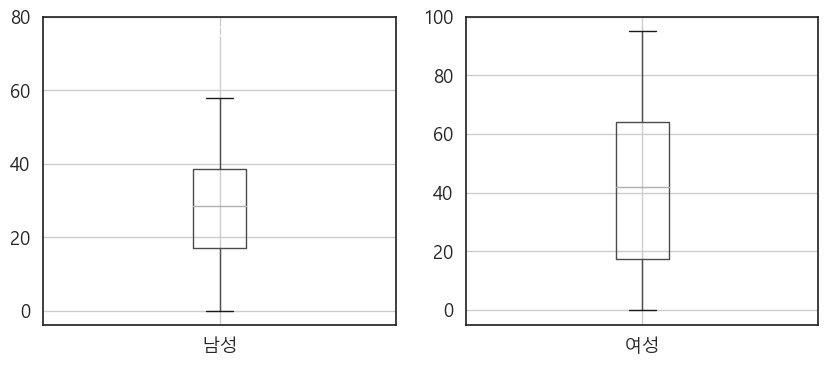

In [199]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
성별_건강관심도등급.boxplot(['남성'],ax=ax1)
성별_건강관심도등급.boxplot(['여성'],ax=ax2)
plt.ylim(-5,100)
plt.show()
plt.close()

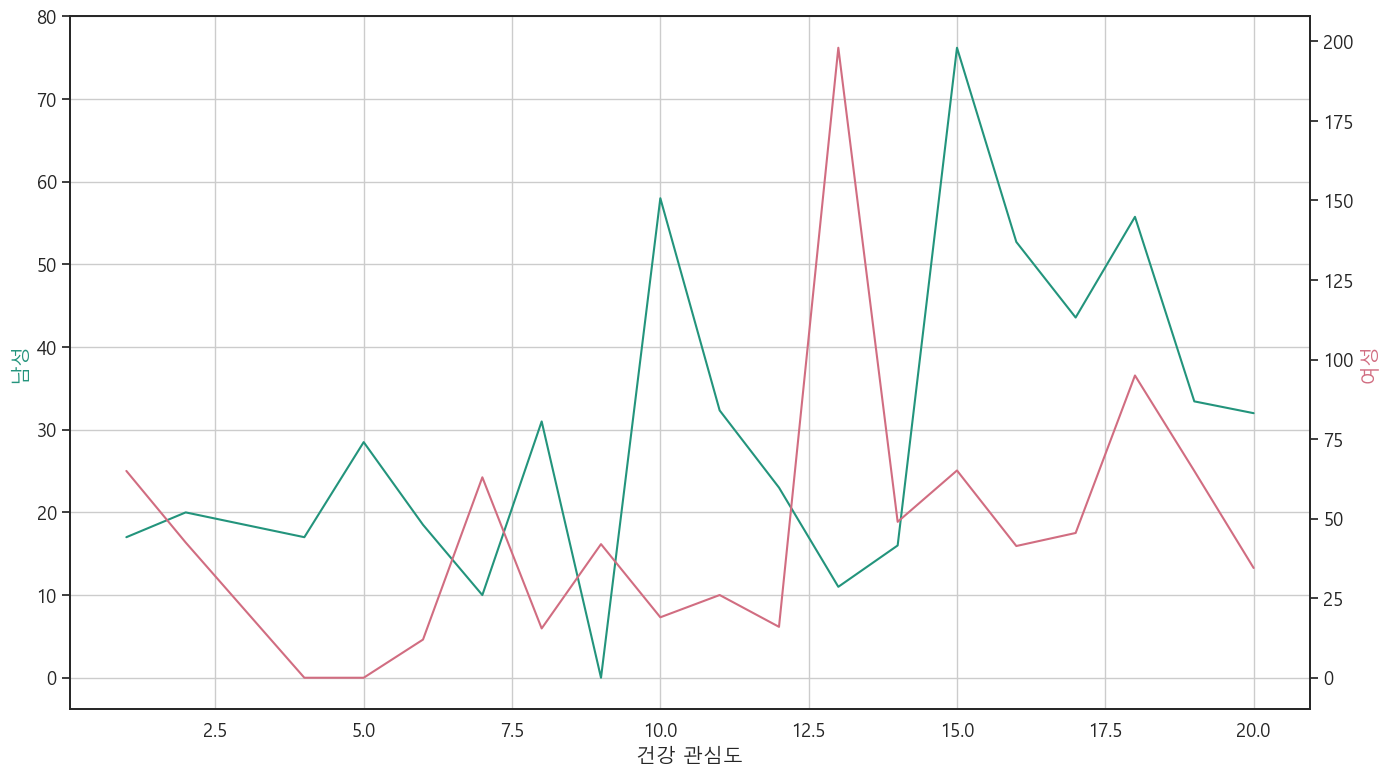

In [155]:
fig, ax1 = plt.subplots(1,1,figsize=(16,9)) # 그래프 시작
ax2 = ax1.twinx() # ax1에 겹쳐지는 서브플롯 생성

# ax1에 그래프 그리기
성별_건강관심도등급['남성'].plot(ax=ax1,color='#23947c')
ax1.set_xlabel('건강 관심도')
ax1.set_ylabel('남성',color='#23947c')
ax1.grid()

# x축 좌표위의 텍스트 처리
start = min(성별_건강관심도등급.index)
end =  max(성별_건강관심도등급.index)
# ax1.set_xticks(list(range(start,end+1)))
# ax1.set_xticklabels(성별_건강관심도등급.index, fontsize=12,color='#000000')

# ax2에 그래프 그리기
성별_건강관심도등급['여성'].plot(ax=ax2, color='#d16d81')
ax2.set_ylabel('여성',color='#d16d81')

plt.show()
plt.close()

모자이크 - 평일/휴일 
+ 성별 소비건수 (두 개 이상 범주에 대한 비율 표시) 

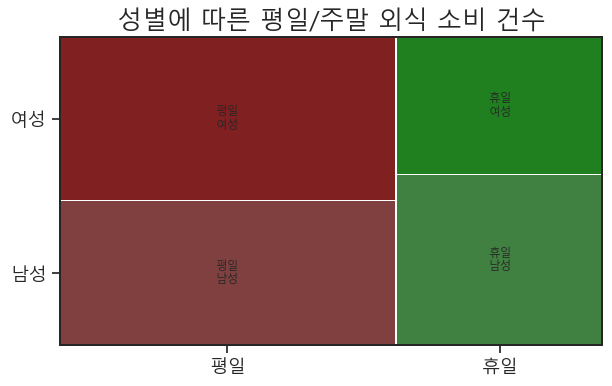

In [156]:
mosaic(df,['평일휴일','성별'])
plt.title('성별에 따른 평일/주말 외식 소비 건수', fontsize=18)
plt.show()
plt.close()

In [157]:
# index를 일반 컬럼으로 변환 
df2 = 성별_건강관심도등급.reset_index()
mdf = melt(df2,id_vars=['건강관심도등급'],value_vars=['남성','여성'],
           var_name='구분',value_name='소비건수합계')
mdf

,건강관심도등급,구분,소비건수합계
0,1,남성,17.000000
1,2,남성,20.000000
2,4,남성,17.000000
3,5,남성,28.500000
4,6,남성,18.500000
5,7,남성,10.000000
6,8,남성,31.000000
7,9,남성,0.000000
8,10,남성,58.000000
9,11,남성,32.333333


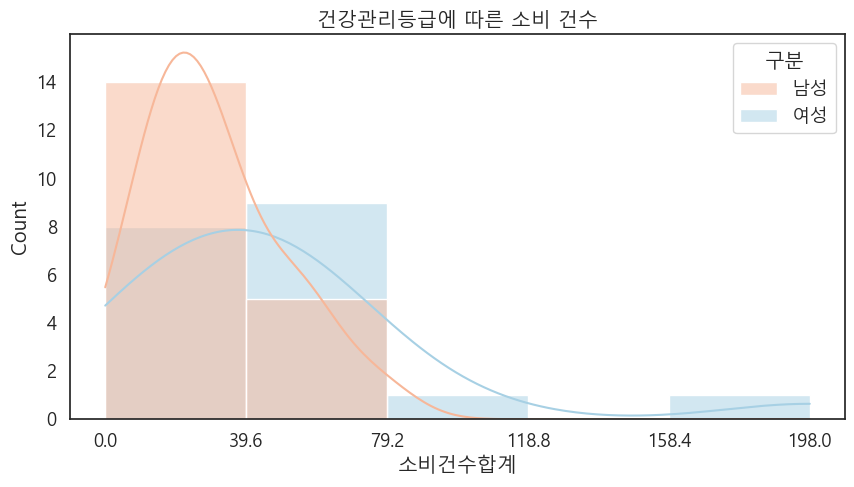

In [158]:
hist, bins = np.histogram(mdf['소비건수합계'], bins=5)
bins2 = np.round(bins, 1)

plt.figure(figsize=(10,5))

sb.set_theme(style='white', font='Malgun Gothic', font_scale=1.2)
plt.title('건강관리등급에 따른 소비 건수')
sb.histplot(data=mdf, x='소비건수합계', bins=5, hue='구분', kde=True, palette='RdBu')
plt.xticks(bins2, bins2) 

plt.show()
plt.close()

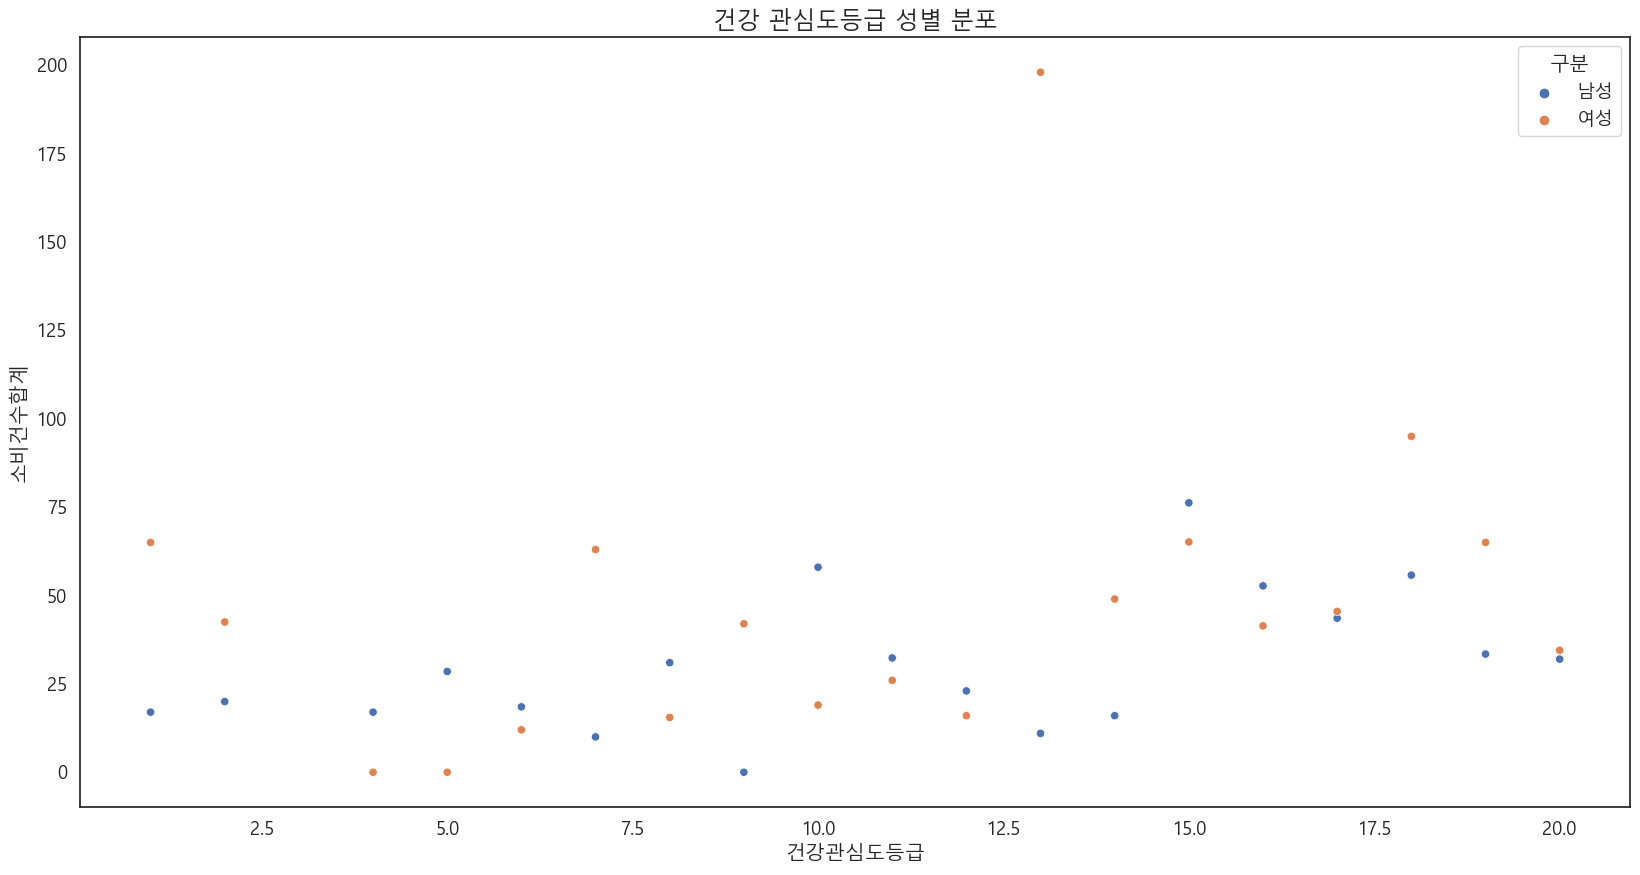

In [159]:
plt.rcParams['font.size'] = 16  # 기본 글자크기 설정
plt.rcParams['figure.figsize'] = (20,10) # 그래프 사이즈 (가로,세로)inch

sb.scatterplot(data=mdf, x='건강관심도등급',y='소비건수합계', hue='구분')
plt.title('건강 관심도등급 성별 분포',fontsize=17)
plt.show()
plt.close()

In [160]:
# index를 일반 컬럼으로 변환 
df3 = 성별_배달식선호등급.reset_index()
mdf2 = melt(df3,id_vars=['배달식선호등급'],value_vars=['남성','여성'],
           var_name='구분',value_name='소비건수합계')
mdf2 = mdf2.fillna(value=0)
mdf2

,배달식선호등급,구분,소비건수합계
0,1,남성,56.090909
1,2,남성,54.666667
2,3,남성,24.500000
3,4,남성,12.500000
4,5,남성,69.000000
5,6,남성,50.333333
6,7,남성,33.750000
7,8,남성,0.000000
8,9,남성,13.500000
9,10,남성,40.000000


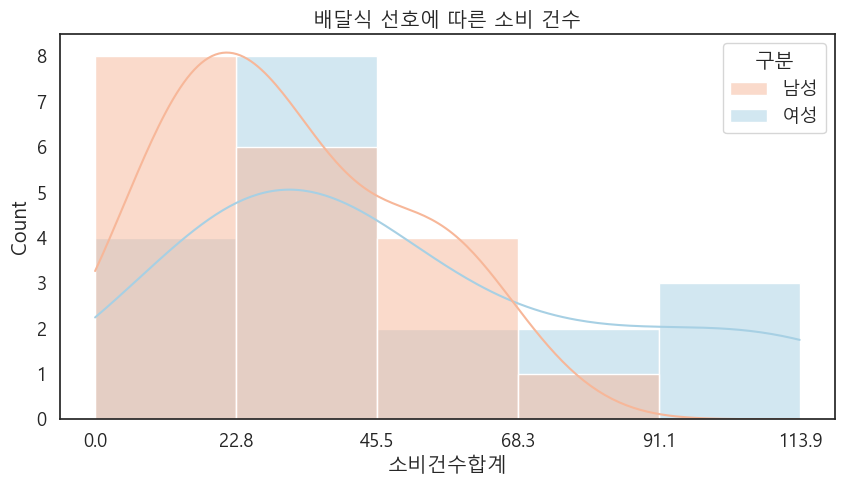

In [161]:
hist, bins = np.histogram(mdf2['소비건수합계'], bins=5)
bins2 = np.round(bins, 1)


plt.figure(figsize=(10,5))
sb.set_theme(style='white', font='Malgun Gothic', font_scale=1.2)
sb.histplot(data=mdf2, x='소비건수합계', bins=5, hue='구분', kde=True, palette='RdBu')
plt.title('배달식 선호에 따른 소비 건수')
plt.xticks(bins2, bins2) 
#plt.ylim(20)

plt.show()
plt.close()

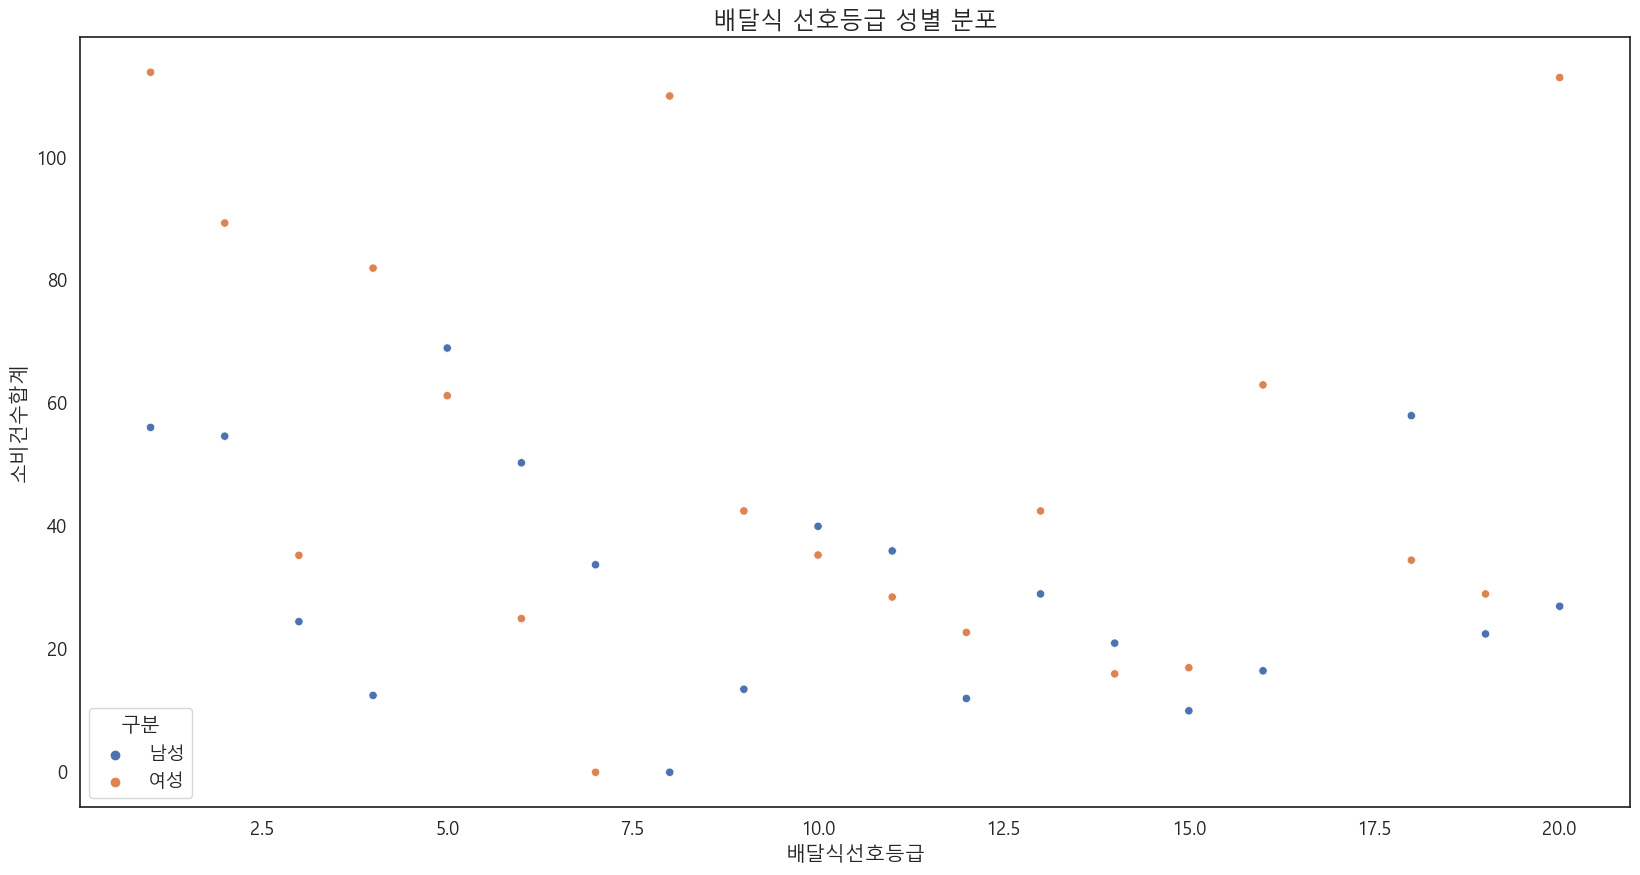

In [162]:
plt.rcParams['font.size'] = 16  # 기본 글자크기 설정
plt.rcParams['figure.figsize'] = (20,10) # 그래프 사이즈 (가로,세로)inch

sb.scatterplot(data=mdf2, x='배달식선호등급',y='소비건수합계', hue='구분')
plt.title('배달식 선호등급 성별 분포',fontsize=17)
plt.show()
plt.close()

In [163]:
# catplot - 건강관심도 
# 등급에 따른 배달음식 소비 건수를 여부를 두 개의 그래프로 분리

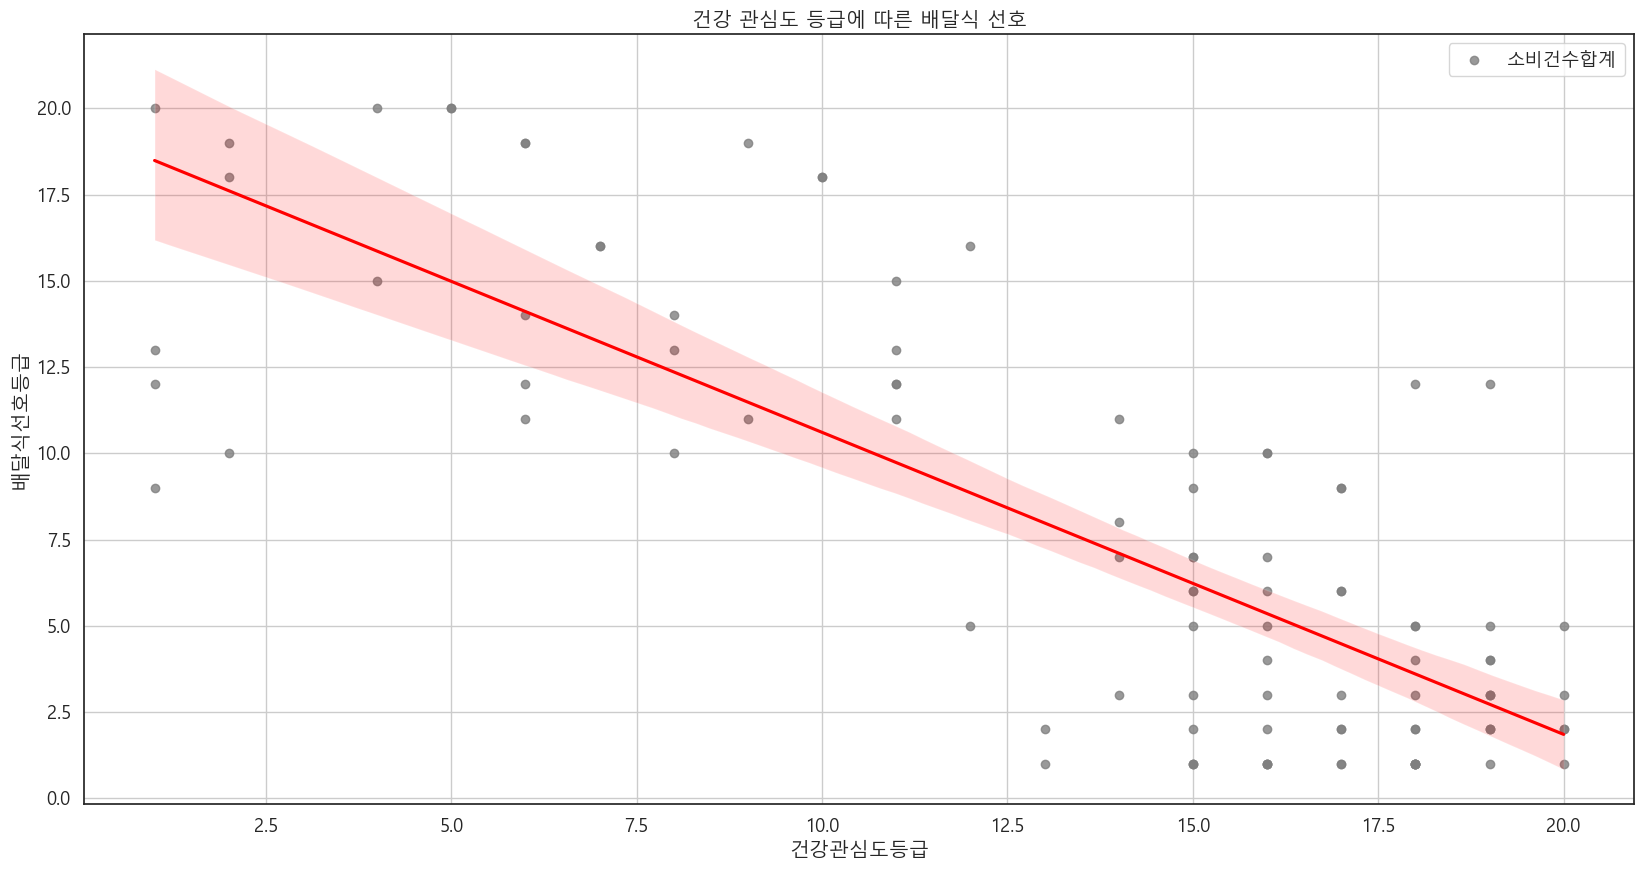

In [164]:
sb.regplot(data=df,x='건강관심도등급',y='배달식선호등급',label='소비건수합계',line_kws={'color':'red'},scatter_kws={'color':'grey'})
plt.title('건강 관심도 등급에 따른 배달식 선호')
plt.xlabel('건강관심도등급')
plt.ylabel('배달식선호등급')
plt.legend()
plt.grid()
plt.show()
plt.close()

### 지도 시각화

In [165]:
from IPython.display import SVG
from bs4 import BeautifulSoup
import requests
from pandas import DataFrame, read_excel
import numpy as np
import os

In [166]:
구별_지도 = 구별.rename(
    index={'종로구':'Jongno-gu',
'중구':'Jung-gu',
'용산구':'Yongsan-gu',
'성동구':'Seongdong-gu',
'광진구':'Gwangjin-gu',
'동대문구':'Dongdaemun-gu',
'중랑구':'Jungnang-gu',
'성북구':'Seongbuk-gu',
'강북구':'Gangbuk-gu',
'도봉구':'Dobong-gu',
'노원구':'Nowon-gu',
'은평구':'Eunpyeong-gu',
'서대문구':'Seodaemun-gu',
'마포구':'Mapo-gu',
'양천구':'Yangcheon-gu',
'강서구':'Gangseo-gu',
'구로구':'Guro-gu',
'금천구':'Geumcheon-gu',
'영등포구':'Yeongdeungpo-gu',
'동작구':'Dongjak-gu',
'관악구':'Gwanak-gu',
'서초구':'Seocho-gu',
'강남구':'Gangnam-gu',
'송파구':'Songpa-gu',
'강동구':'Gangdong-gu'}
)
구별_지도

성별,남성,여성
거주지_시군구,,
Gangnam-gu,64.0,91.50
Gangdong-gu,0.0,37.50
Gangbuk-gu,29.5,0.00
Gangseo-gu,82.5,69.00
Gwanak-gu,81.0,198.00
Gwangjin-gu,16.0,0.00
Guro-gu,0.0,17.00
Nowon-gu,33.0,36.50
Dobong-gu,10.0,0.00


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


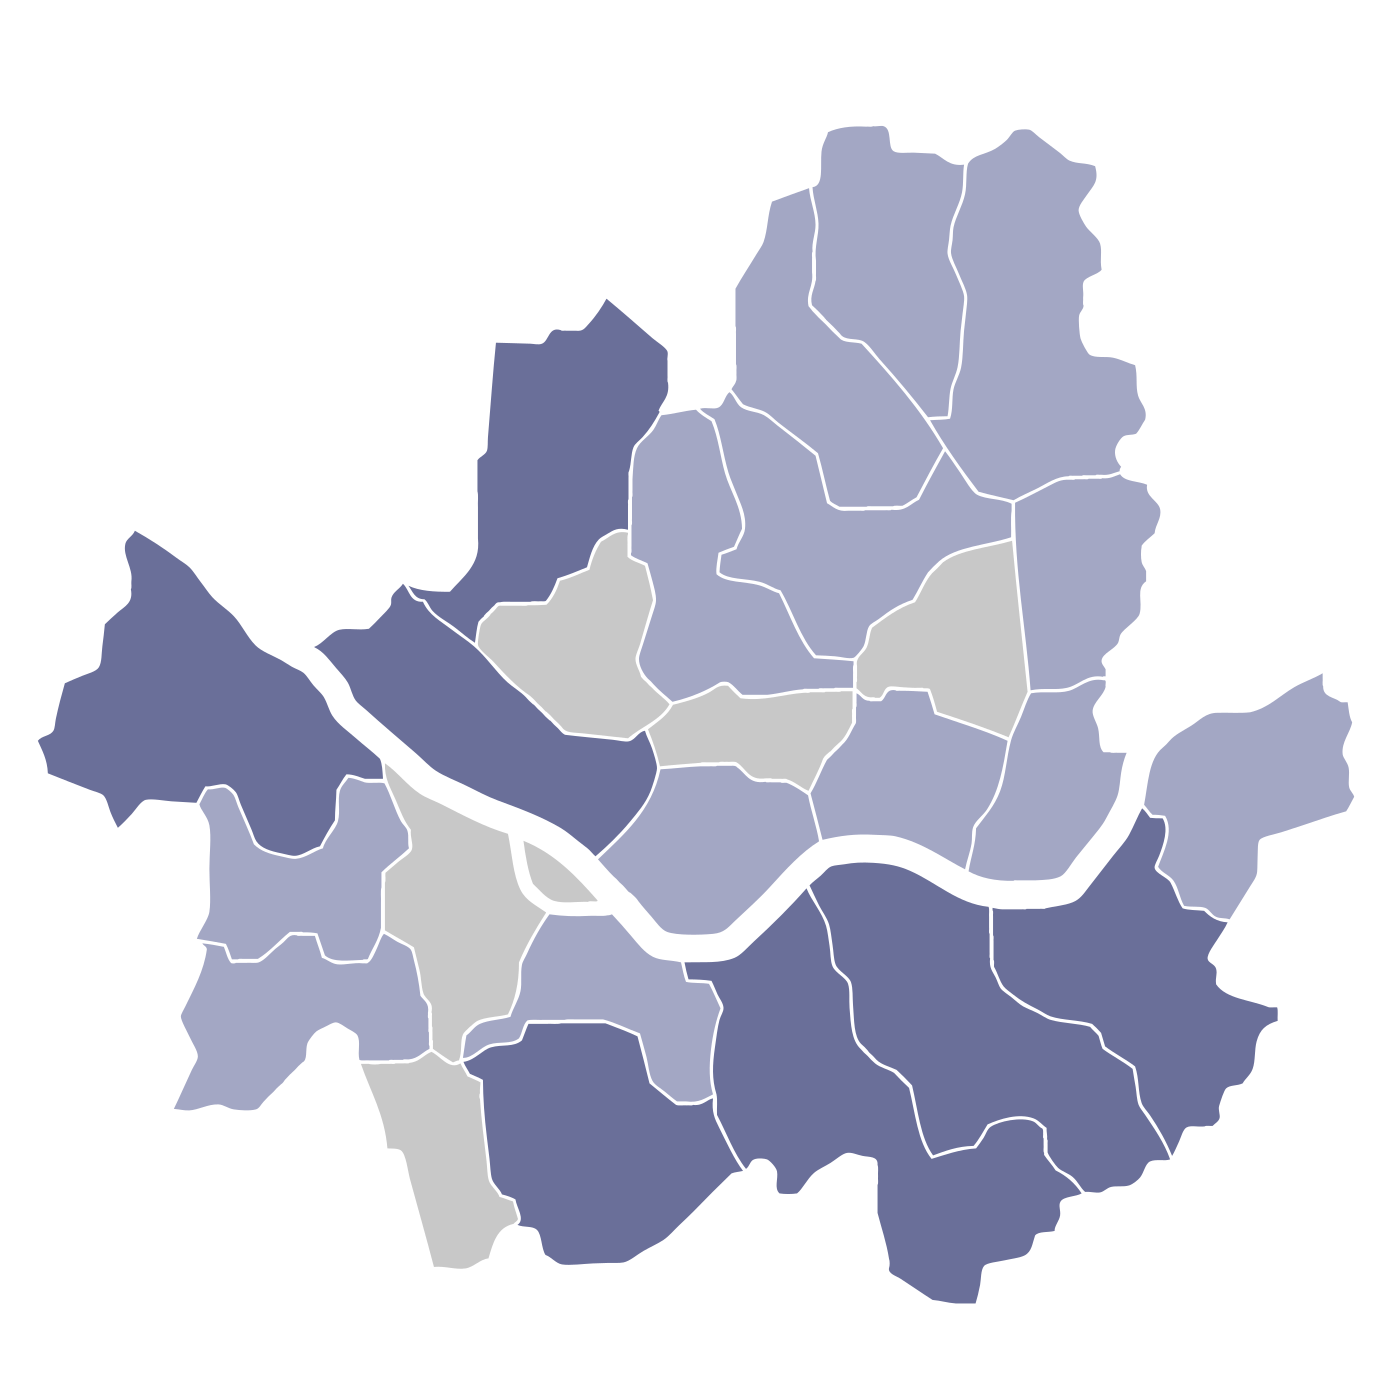

In [167]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36})"
header_info = {'User-agent': user_agent, 'referer': None}
r = requests.get('https://data.hossam.kr/D04/map_seoul.svg', headers=header_info)

if r.status_code != 200 :
    err_msg="%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
    raise Exception(err_msg)

map_svg = r.text
soup = BeautifulSoup(map_svg)

path_list = soup.select('path[id]')
boys_colors = ['#a3a7c4', '#6a6f99', '#373d6e', '#131840', '#060926', '#010314']
구별_지도['색상값'] = None

for p in path_list:
    거주지_시군구 = p['id']
    try :
        남성 = 구별_지도.loc[거주지_시군구, '남성']
        if 남성 > 250:   color_index = 5
        elif 남성 > 200: color_index = 4
        elif 남성 > 150: color_index = 3
        elif 남성 > 100: color_index = 2
        elif 남성 > 50:  color_index = 1
        else:                 color_index = 0
        구별_지도.loc[거주지_시군구, '색상값'] = boys_colors[color_index]
        p['fill'] = boys_colors[color_index]
    except :
        pass
new_seoul_svg = soup.prettify() 

SVG(new_seoul_svg) 

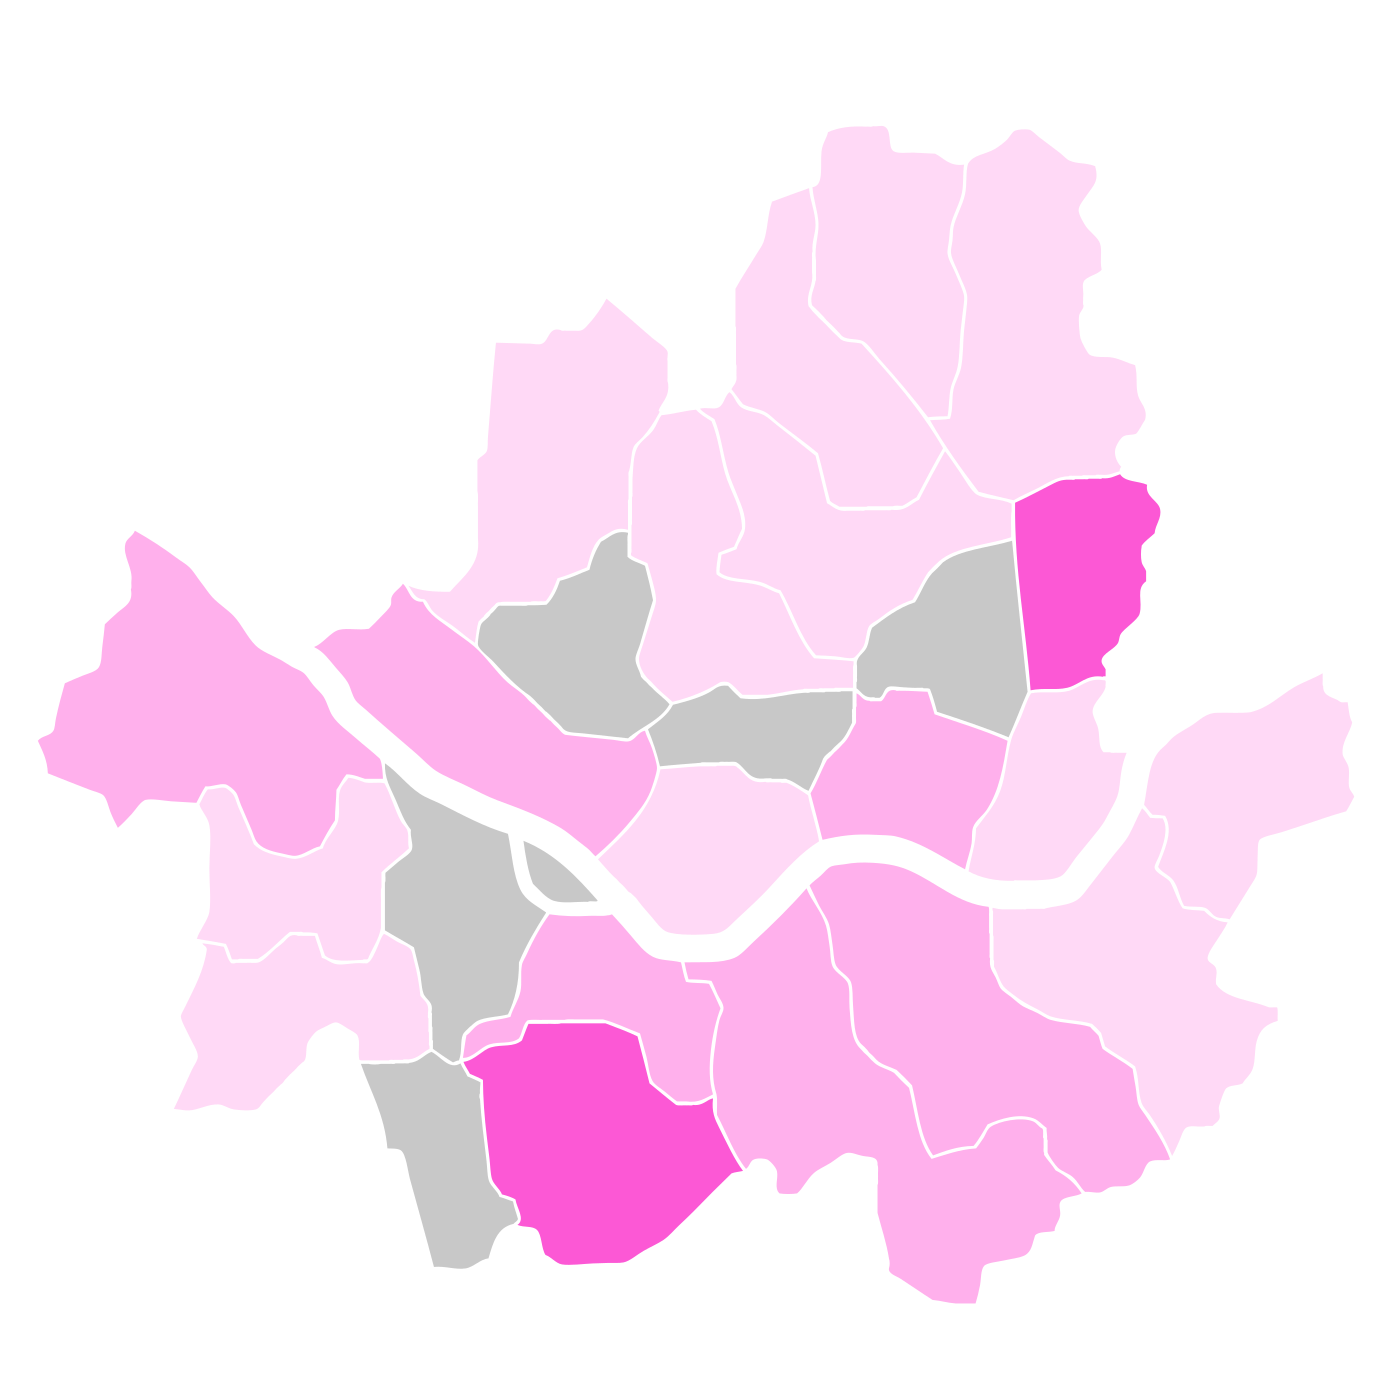

In [168]:
# 사용할 색상값 (단계별로 6개 색상 준비)
woman_colors = ['#ffd9f6', '#ffb0ec', '#fc83df', '#fc58d5', '#fc32cc', '#c9049b']

for p in path_list:
    #print(p)

    거주지_시군구 = p['id']
    #print(거주지_시군구)
    
    try :
        여성 = 구별_지도.loc[거주지_시군구, '여성']
        #print(거주지_시군구, " -->", 여성)

        # 여성 수에 따라 단계값 설정 (단계는 색상값의 수에 따름)
        if 여성 > 250:   color_index = 5
        elif 여성 > 200: color_index = 4
        elif 여성 > 150: color_index = 3
        elif 여성 > 100: color_index = 2
        elif 여성 > 50:  color_index = 1
        else:                 color_index = 0

        # 각 지역별 색상값을 데이터 프레임에 변환
        구별_지도.loc[거주지_시군구, '색상값'] = woman_colors[color_index]

        # svg 이미지의 면 색상 변경
        p['fill'] = woman_colors[color_index]
        
    except :
        pass

# bs4 객체의 내용을 문자열로 리턴
new_seoul_svg = soup.prettify() # 변경된 문자열을 다시 뽑아줌 (prettyfy)

# jupyter에서 svg 이미지 표시하기
# 사용방법 -> SVG(소스문자열)  혹은   SVG(파일경로)


SVG(new_seoul_svg) 

In [169]:
# 결론 : 시각화 
# 배달 음식을 자주 시켜먹는 사람의 성별 특징은 이거다. 
# 여성 -> 
# 남성 -> 
# 가장 영향을 많이 끼치는 요인 / 카테고리 를 3가지로 나눠서 




# sb.catplot(data=df,
#            x="Pclass",
#            col = 'Survived', # 캔버스 분리하기
#            kind='count', # 빈도 막대그래프 그리기
#            palette='deep',
#            hue='Sex')
# plt.show()

기사 크롤링 키워드 : 성별 / 지역 / 카테고리 / 연령 / 평일-휴일 -> 워드클라우드